# Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.

In [2]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r'C:/Python/Project/Capstone Project/Project/Walmart.csv') #Import Dataset

In [3]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
data.shape

(6435, 8)

In [5]:
data.isnull().sum() #check For Null Values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
data.Store.unique() # check Numbers Of Stores

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

# 1. Using the above data, come up with useful insights that can be used by each of the stores to improve in various areas

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

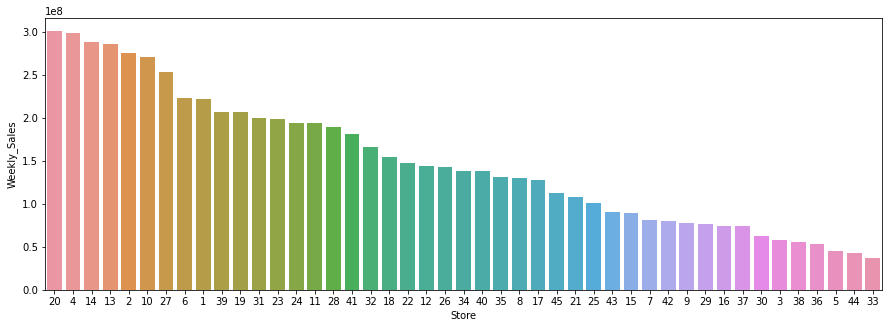

In [8]:
#Weekly Sales Per Store
d1=data.groupby(['Store']).sum().reset_index()
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Weekly_Sales', data=d1, order=d1.sort_values(by='Weekly_Sales',ascending=False)['Store'])

<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

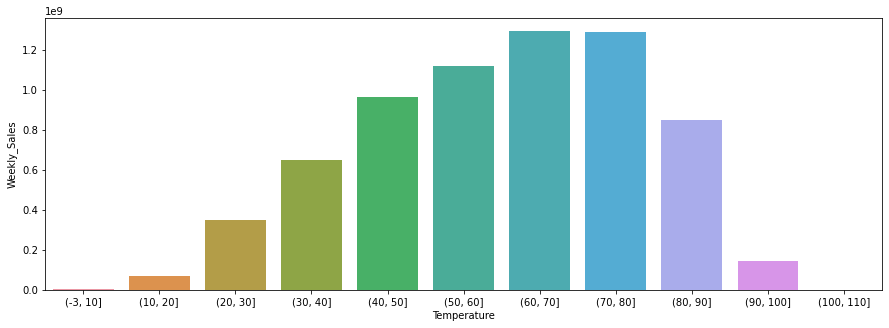

In [9]:
#Weekly Sales & Temperature Relation
d2=data[['Temperature','Weekly_Sales']]
bins=[-3,10,20,30,40,50,60,70,80,90,100,110]
d2['Temperature']=pd.cut(d2['Temperature'],bins)
d2=d2.groupby(['Temperature']).sum().reset_index()
plt.figure(figsize=(15,5))
sns.barplot(x='Temperature',y='Weekly_Sales', data=d2)

<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

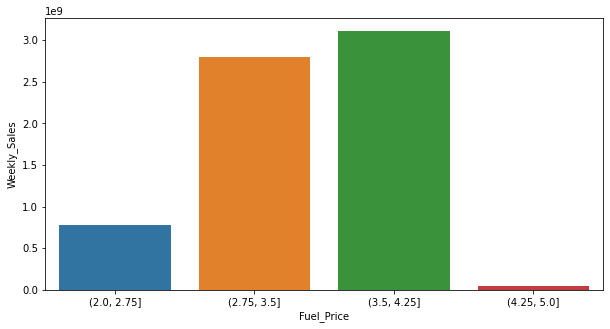

In [10]:
#Weekly Sales & Fuel Price Relation
d3=data[['Fuel_Price','Weekly_Sales']]
bin1=np.linspace(2,5,5)
d3['Fuel_Price']=pd.cut(d3['Fuel_Price'],bin1)
d3=d3.groupby(['Fuel_Price']).sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Fuel_Price',y='Weekly_Sales', data=d3)

<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

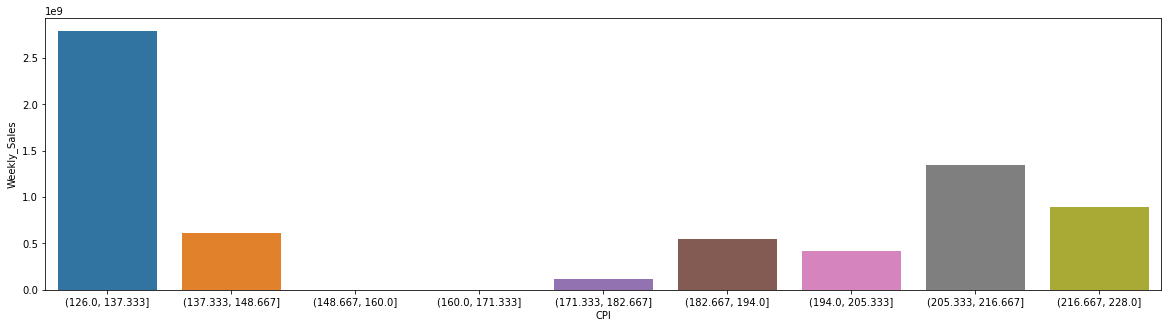

In [11]:
#Weekly Sales & Consumer Price Index Relation
d4=data[['CPI','Weekly_Sales']]
bin2=np.linspace(126,228,10)
d4['CPI']=pd.cut(d4['CPI'],bin2)
d4=d4.groupby(['CPI']).sum().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(x='CPI',y='Weekly_Sales', data=d4)

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

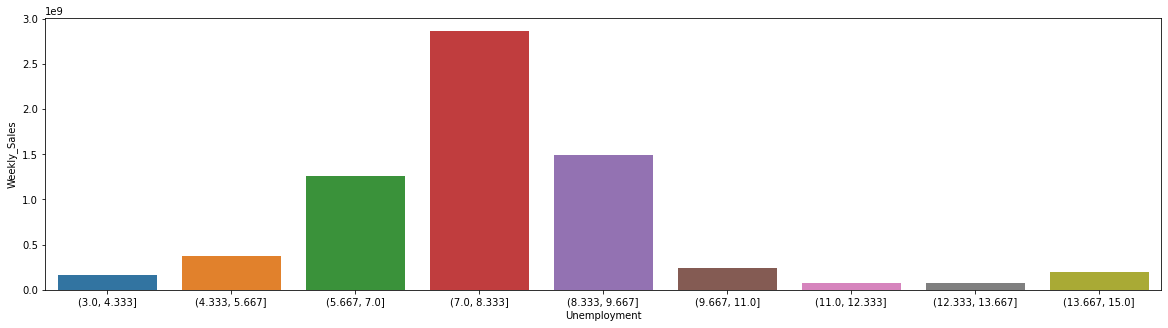

In [12]:
#Weekly Sales & Unemployment Relation
d5=data[['Unemployment','Weekly_Sales']]
bin3=np.linspace(3,15,10)
d5['Unemployment']=pd.cut(d5['Unemployment'],bin3)
d5=d5.groupby(['Unemployment']).sum().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(x='Unemployment',y='Weekly_Sales', data=d5)

# 2. Forecast the sales for each store for the next 12 weeks.

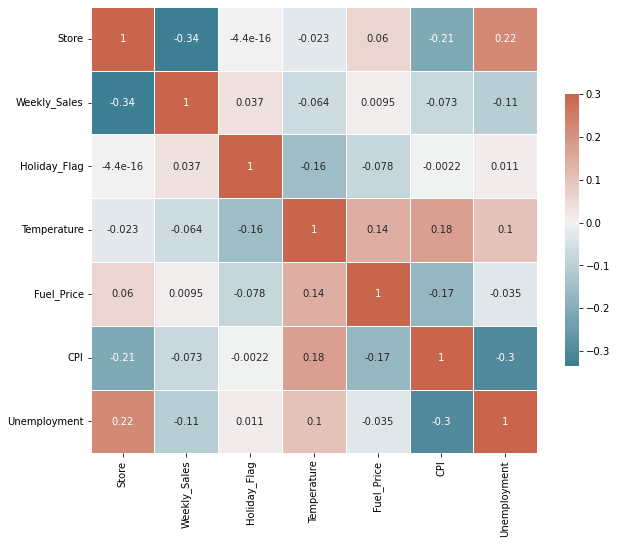

In [13]:
#plotting Correlation Plot
corr = data.corr()
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

In [14]:
#From correlation plot we know weekly sell depends on Store and Unemployment Column so keep that columns 
#also create Year,Month and day column based on date column

In [15]:
data1=data.copy()

In [16]:
#split Date Column to Day,Month And Year Column For Model Training Purpose
data1['Year'] = pd.to_datetime(data1['Date']).dt.year
data1['Month'] = pd.to_datetime(data1['Date']).dt.month
data1['Day'] = pd.to_datetime(data1['Date']).dt.day
data2=data1.drop(columns=['Date', 'Holiday_Flag', 'Fuel_Price', 'Temperature', 'CPI'])

In [17]:
#Model Building

In [18]:
#We Have Different 45 Store So Need To Split According to each store for taking each store samples for training
from sklearn.model_selection import train_test_split
x_train1=pd.DataFrame()
x_test1=pd.DataFrame()
y_train1=pd.DataFrame()
y_test1=pd.DataFrame()
for i in range(1,46):
    datas=data2[data2['Store']==i]
    X=datas.drop(columns=['Weekly_Sales'])
    Y=datas['Weekly_Sales']
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
    x_train1=pd.concat([x_train1, x_train], axis=0)
    x_test1=pd.concat([x_test1, x_test], axis=0)
    y_train1=pd.concat([y_train1, y_train], axis=0)
    y_test1=pd.concat([y_test1, y_test], axis=0)

In [19]:
print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)
print(y_test1.shape)

(4500, 5)
(4500, 1)
(1935, 5)
(1935, 1)


In [20]:
#For This Problem We Use Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train1,y_train1)

RandomForestRegressor()

In [21]:
ypred=rfr.predict(x_test1)

In [22]:
from sklearn.metrics import r2_score,mean_squared_error

In [23]:
r2_score(y_test1,ypred)

0.9581795775582738

In [24]:
xtrainpred=rfr.predict(x_train1)

In [25]:
mean_squared_error(y_train1,xtrainpred)         #MSE For Training Data

2319547556.9074855

In [26]:
np.sqrt(mean_squared_error(y_train1,xtrainpred))   #RMSE For Training Data

48161.68141694687

In [27]:
mean_squared_error(y_test1,ypred)               #MSE For Testing Data

13646455820.844648

In [28]:
np.sqrt(mean_squared_error(y_test1,ypred))       ##RMSE For Testing Data

116818.04578422227

In [29]:
#Forecasting Sales for each Store For Next 12 Weeks

In [30]:
data3=data.copy()

In [31]:
data3['Date']=pd.to_datetime(data3['Date'])

In [32]:
#Making Format For Next 12 Weeks
futdate=[]
futstore=[]
futemplo=[]
for i in range(1,46):
    st=data3[data3['Store']==i]
    for m in range (1,13):
        d11=st['Date'].max()+timedelta(weeks=m)
        futdate.append(d11)
        futstore.append(i)
        futemplo.append(st['Unemployment'].mean())

In [33]:
futuredf=pd.DataFrame()
futuredf['Date']=futdate
futuredf['Store']=futstore
futuredf['Unemployment']=futemplo

In [34]:
futuredf['Year'] = pd.to_datetime(futuredf['Date']).dt.year
futuredf['Month'] = pd.to_datetime(futuredf['Date']).dt.month
futuredf['Day'] = pd.to_datetime(futuredf['Date']).dt.day
newfuture=futuredf.drop(columns=['Date'])
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [35]:
newfuture['Predicted_Sales']=rfr.predict(newfuture)#new Created Next 12 weeks Data Pass Throught our Regressor

In [36]:
newfuture      #final Forecasting Sales Of each Store for next 12 Weeks 

,Store,Unemployment,Year,Month,Day,Predicted_Sales
0,1,7.610,2012,12,17,1806633.062
1,1,7.610,2012,12,24,2253204.670
2,1,7.610,2012,12,31,1555093.352
3,1,7.610,2013,1,7,1596688.800
4,1,7.610,2013,1,14,1466017.629
...,...,...,...,...,...,...
535,45,8.649,2013,2,4,786545.870
536,45,8.649,2013,2,11,752332.283
537,45,8.649,2013,2,18,744605.897
538,45,8.649,2013,2,25,735705.359


<AxesSubplot:xlabel='Store', ylabel='Predicted_Sales'>

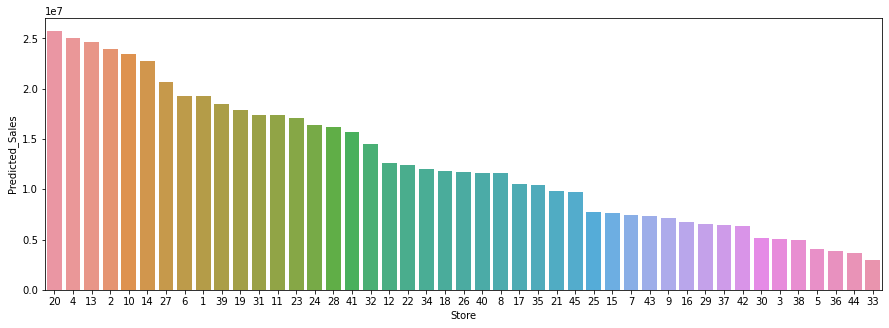

In [37]:
#checking Future Sales Of Stores
nfd=pd.DataFrame(newfuture.groupby('Store')['Predicted_Sales'].sum().reset_index())
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Predicted_Sales', data=nfd, order=nfd.sort_values(by='Predicted_Sales',ascending=False)['Store'])

In [38]:
nfd.sort_values(by='Predicted_Sales',ascending=False) #Future Sales of Stores in Descending Order

,Store,Predicted_Sales
19,20,25740154.736
3,4,25074167.826
12,13,24685932.909
1,2,23958310.737
9,10,23423044.275
13,14,22784394.956
26,27,20688431.676
5,6,19300220.438
0,1,19294699.433
38,39,18523407.700


In [39]:
#Save Walmart Predicted Sales of Each Store for Next 12 Weeks
#newfuture.to_csv('C:\\Users\\sysab\\OneDrive\\Desktop\\walmartfuture.csv')